In [1]:
! pip install seaborn --upgrade

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: seaborn in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (0.11.1)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme(style = "dark")
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_e62b6c1bb76c4710b1d1cc5aeab9a929 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_e62b6c1bb76c4710b1d1cc5aeab9a929 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_e62b6c1bb76c4710b1d1cc5aeab9a929)

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='StudentsPerformance.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df_student = df_data_1.copy()

In [5]:
df_student.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df_student.shape

(1000, 8)

### EDA

In [7]:
def score(score, hue):
    plt.figure(figsize = (20,10))
    sns.kdeplot(x = score, hue = hue, data = df_student)
    plt.xlabel('%s'%score)
    plt.title("The %s across different races"%score)
    plt.show();

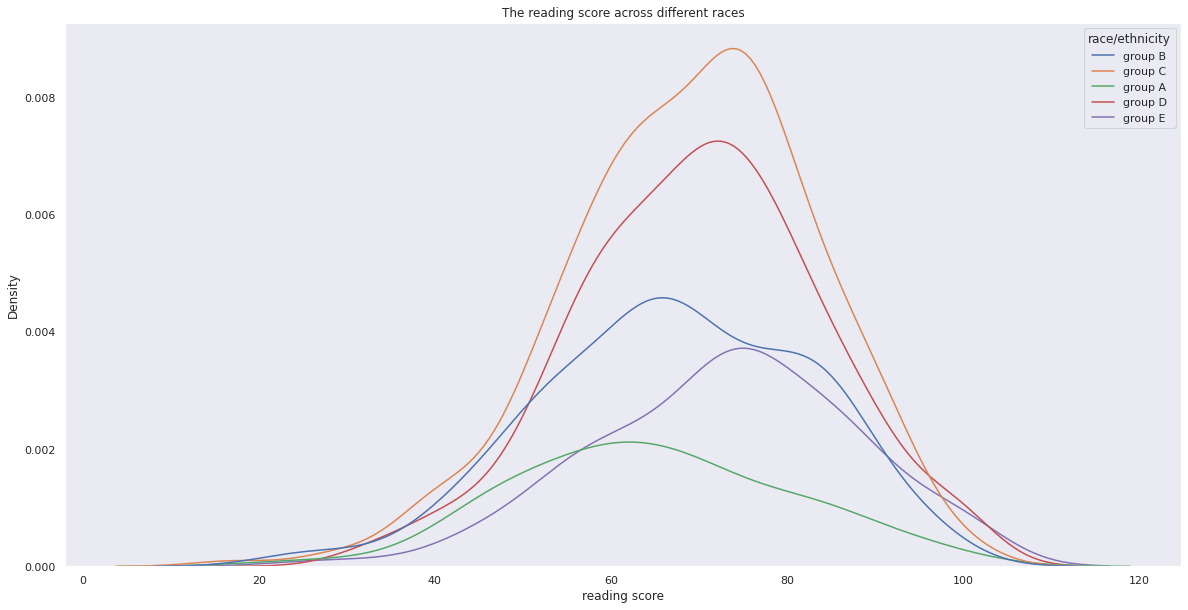

In [8]:
score("reading score", "race/ethnicity")

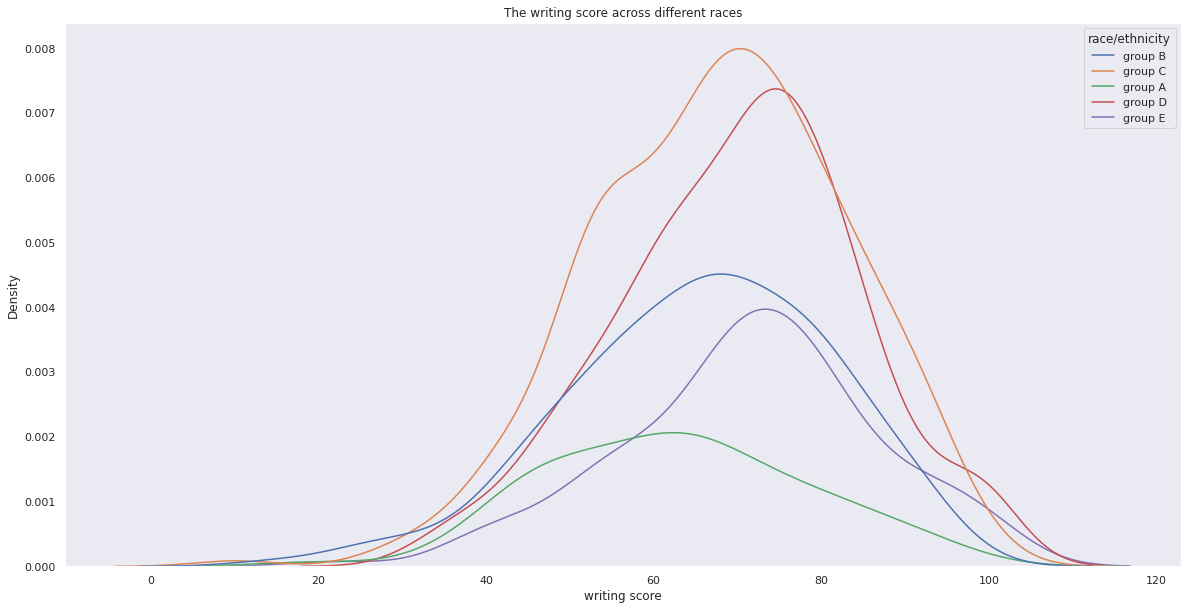

In [9]:
score("writing score", "race/ethnicity")

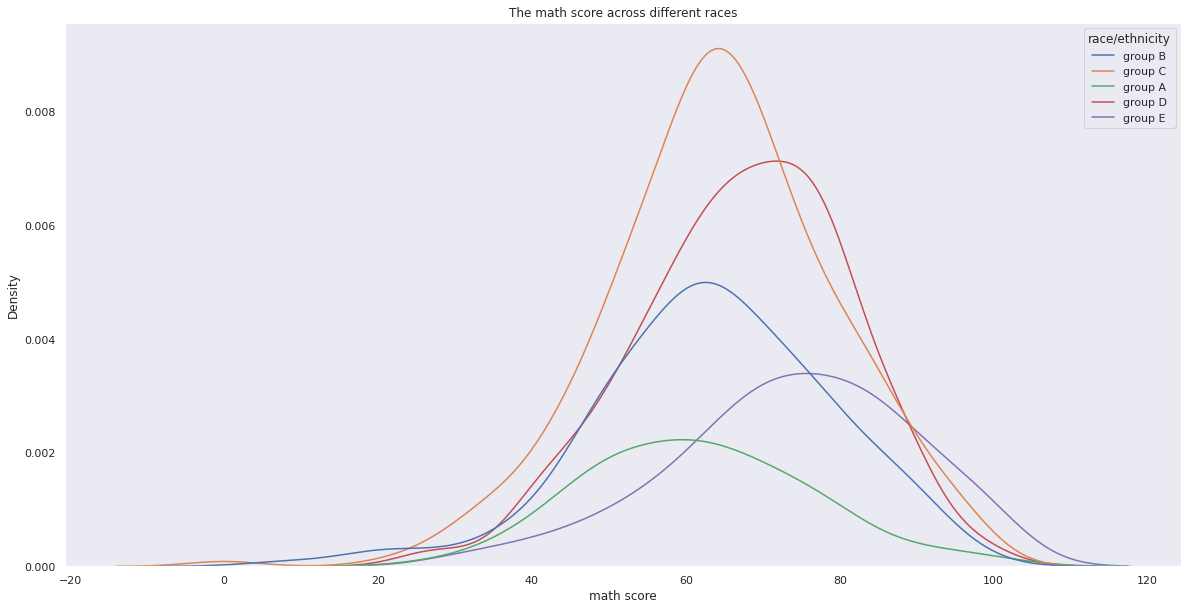

In [10]:
score("math score", "race/ethnicity")

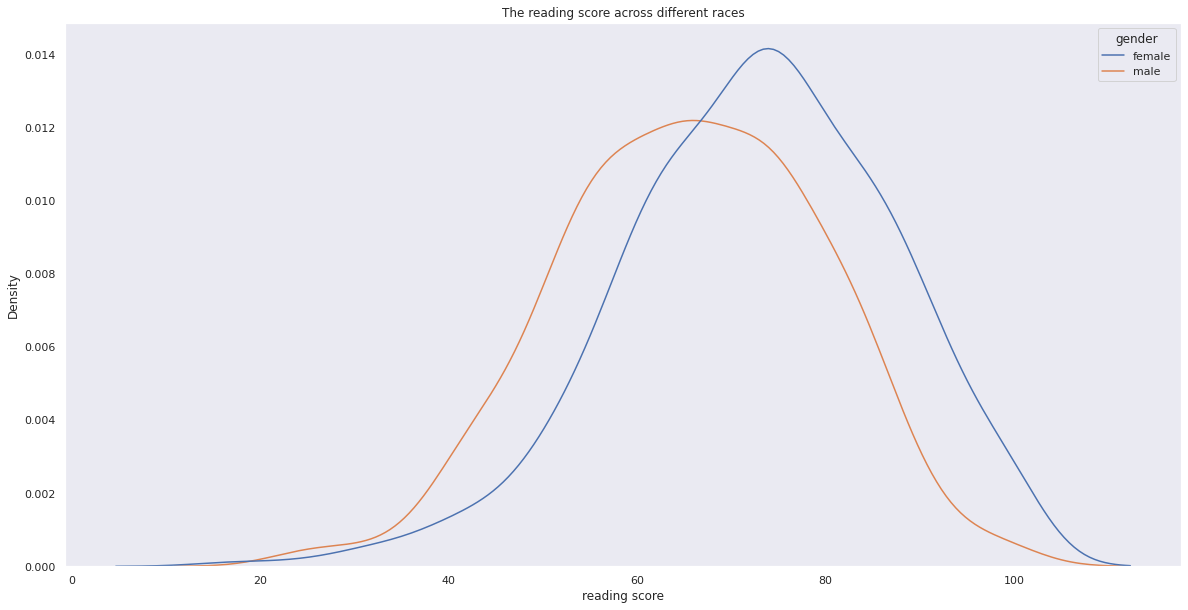

In [11]:
score("reading score", "gender")

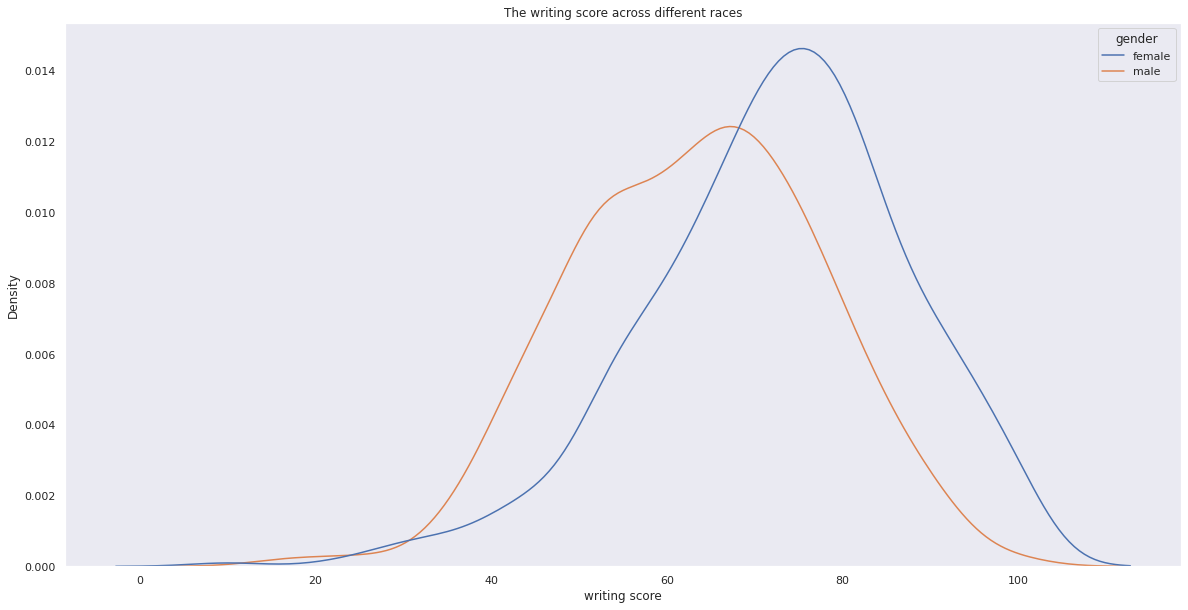

In [12]:
score("writing score", "gender")

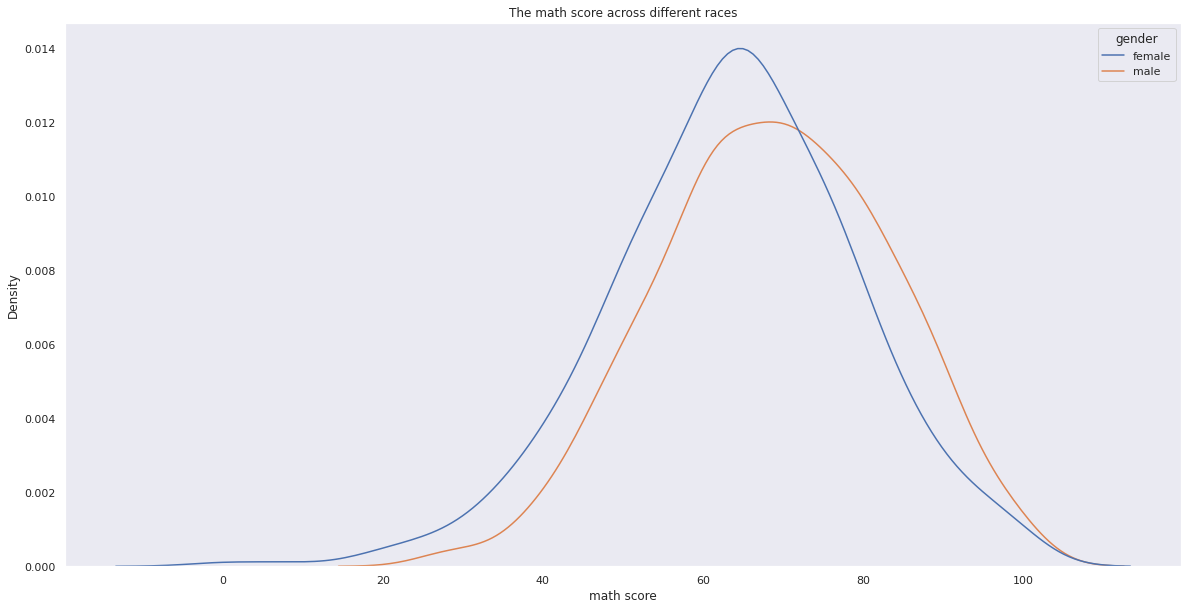

In [13]:
score("math score", "gender")

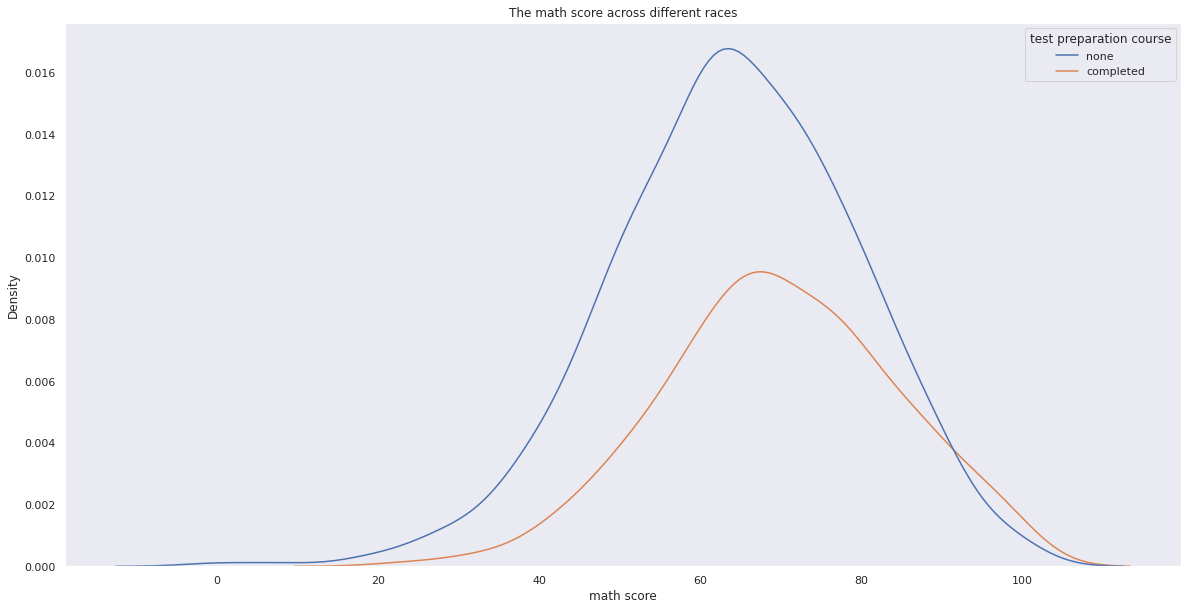

In [14]:
score("math score", "test preparation course")

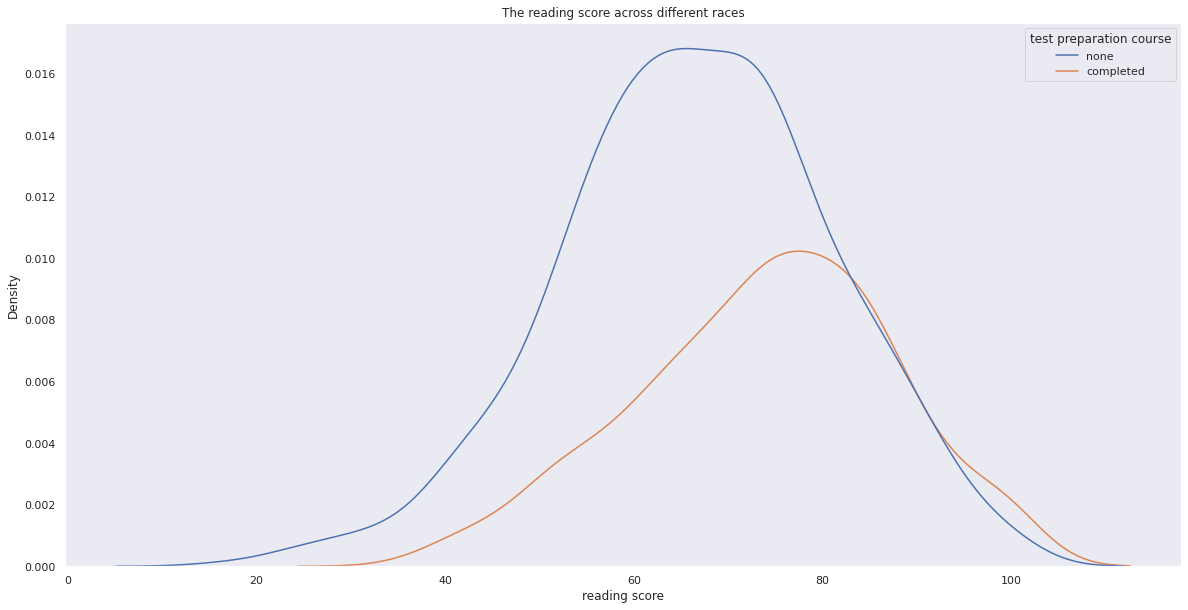

In [15]:
score("reading score", "test preparation course")

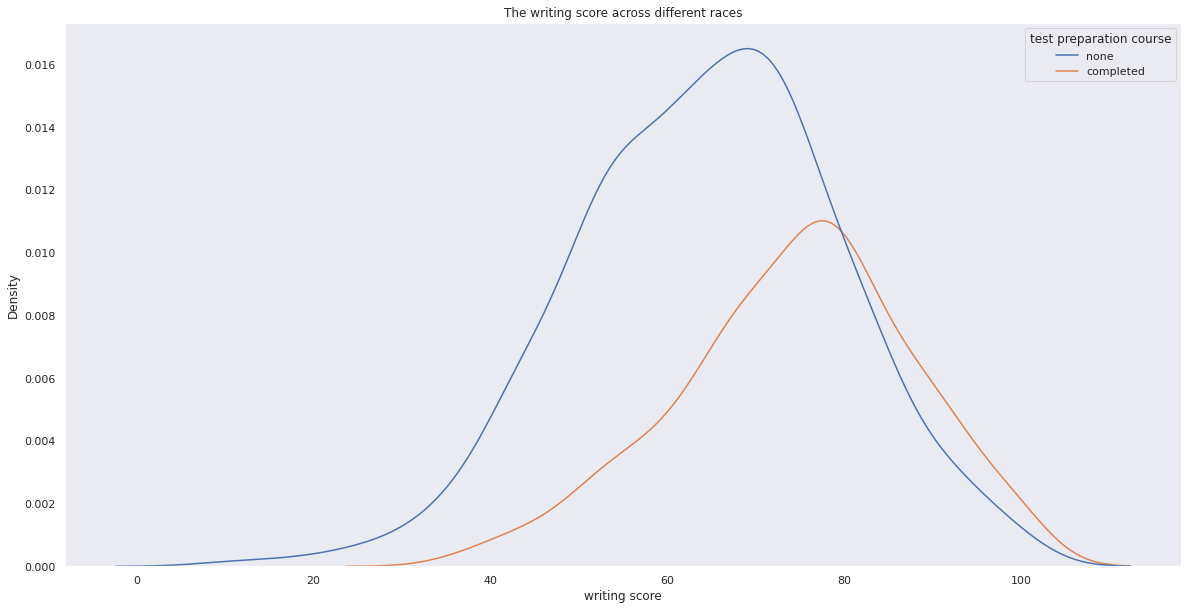

In [16]:
score("writing score", "test preparation course")

In [17]:
df_new = pd.melt(df_student, id_vars = ["race/ethnicity"], value_vars = ['math score', 'reading score', 'writing score'], value_name = 'score', var_name = "course")

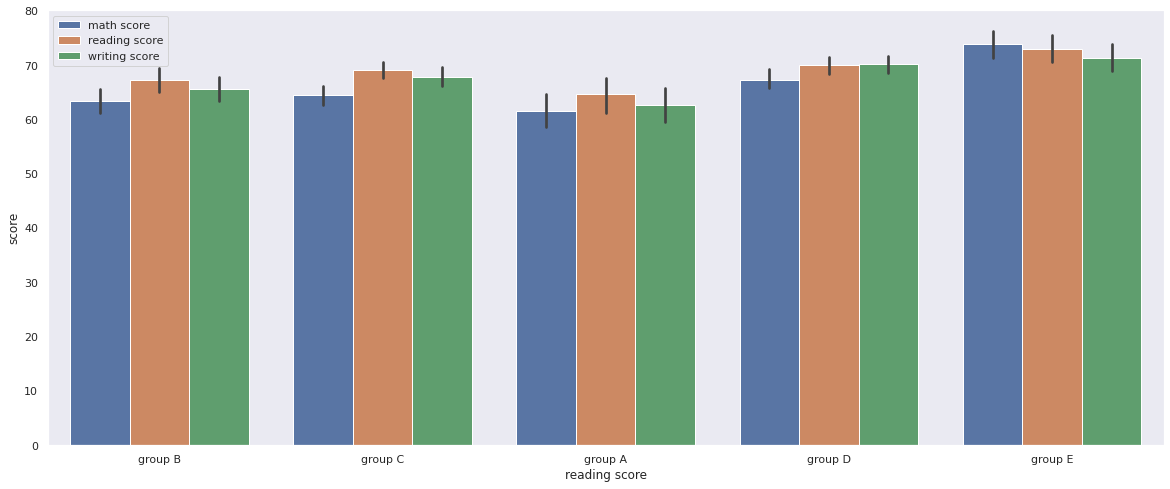

In [21]:
plt.figure(figsize = (20,8))
sns.barplot(x = "race/ethnicity", y = "score", data = df_new, hue = "course")
plt.xlabel("reading score")
plt.legend(loc = "upper left")
plt.show();